# Trabalho de Segmentação

## Importação da imagem

In [16]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

print "OpenCV Version : %s " % cv2.__version__

img = cv2.imread('/home/felipe/Documentos/notebook_pi/segmentacao/water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

OpenCV Version : 3.1.0 


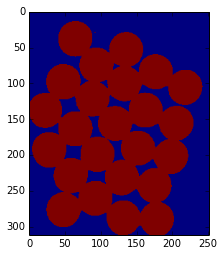

In [17]:
plt.imshow(thresh)
plt.show()

## Tratamento da imagem

### Noise removal

In [18]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

### Sure background area

In [19]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

### Finding sure foreground area

In [20]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

### Finding unknown region

In [21]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

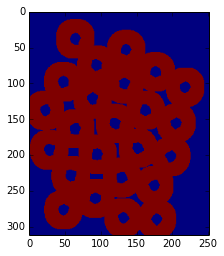

In [22]:
plt.imshow(unknown)
plt.show()

### Marker labelling

In [23]:
ret, markers = cv2.connectedComponents(sure_fg)

### Add one to all labels so that sure background is not 0, but 1

In [29]:
markers = markers + 1

### Now, mark the region of unknown with zero

In [31]:
markers[unknown == 255] = 0

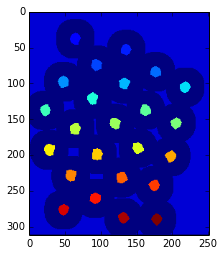

In [32]:
plt.imshow(markers)
plt.show()

### Aplicando as marcações

In [33]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

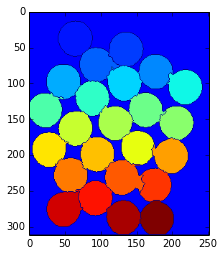

In [34]:
plt.imshow(markers)
plt.show()

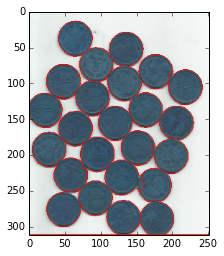

In [35]:
plt.imshow(img)
plt.show()